<a href="https://colab.research.google.com/github/NRmethun/ML-DL-Notebook/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D ,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [500, 500]

path = '/content/drive/My Drive/Datasets/Bangla_English'
train_path = '/content/drive/My Drive/Datasets/Bangla_English/Train'
valid_path ='/content/drive/My Drive/Datasets/Bangla_English/Validation'
test_path =  '/content/drive/My Drive/Datasets/Bangla_English/Test'




# train_data_dir = '/content/drive/My Drive/Datasets/Bangla_English/Train'
# validation_data_dir = '/content/drive/My Drive/Datasets/Bangla_English/Validation'

# test_data_dir = '/content/drive/My Drive/Datasets/Bangla_English/Test'

In [ ]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in mobilnet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Datasets/Bangla_English/Train/*')

In [ ]:
folders
last_output =  mobilnet.output

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = Dense  (2, activation='softmax')(x)

model = Model( mobilnet.input, x)

model.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout

num_classes = 2

# model = keras.Sequential()
# model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3) ))
# model.add(Dropout(0.5))
# model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))
# model.add(Dropout(0.3))
# model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
#model = Model(inputs=mobilnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 500, 500, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 500, 500, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 500, 500, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 250, 250, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 250, 250, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 250, 250, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 125, 125, 128)    

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,


      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255 ,
                                  rotation_range=40)


In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (500,500),
                                                 batch_size = 32,
                                               #  color_mode="grayscale",
                                                 class_mode = 'categorical')

Found 227 images belonging to 2 classes.


In [ ]:
len(training_set)

8

In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (500,500),
                                            batch_size = 32,
                                            # color_mode="grayscale",
                                            class_mode = 'categorical')

Found 110 images belonging to 2 classes.


In [ ]:
len(test_set)

4

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
8/8 [==============================] - 89s 11s/step - loss: 28.9314 - accuracy: 0.5330 - val_loss: 8.6163 - val_accuracy: 0.6364
Epoch 2/50
8/8 [==============================] - 80s 10s/step - loss: 4.5006 - accuracy: 0.7885 - val_loss: 7.8995 - val_accuracy: 0.7000
Epoch 3/50
8/8 [==============================] - 81s 10s/step - loss: 3.2254 - accuracy: 0.8767 - val_loss: 9.8427 - val_accuracy: 0.6636
Epoch 4/50
8/8 [==============================] - 80s 10s/step - loss: 2.5436 - accuracy: 0.8811 - val_loss: 2.1736 - val_accuracy: 0.8545
Epoch 5/50
8/8 [==============================] - 81s 10s/step - loss: 1.5063 - accuracy: 0.8855 - val_loss: 0.8576 - val_accuracy: 0.8818
Epoch 6/50
8/8 [==============================] - 80s 10s/step - loss: 1.2385 - accuracy: 0.9383 - val_loss: 1.0880 - val_accuracy: 0.9000
Epoch 7/50
8/8 [==============================] - 81s 10s/step - loss: 0.6628 - accuracy: 0.9427 - val_loss: 1.9979 - val_accuracy: 0.8273
Epoch 8/50
8/8 [==========

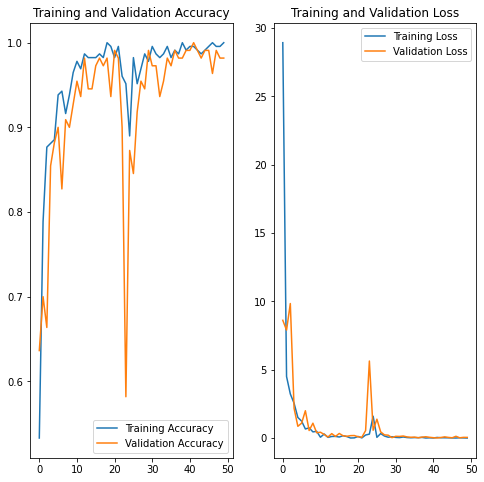

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss=r.history['loss']
val_loss=r.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
test_settt = test_datagen.flow_from_directory(test_path,
                                            target_size = (500, 500),
                                            batch_size = 32,
                                            class_mode = 'categorical')
model.evaluate(test_settt )

Found 66 images belonging to 2 classes.
3/3 [==============================] - 9s 3s/step - loss: 0.0082 - accuracy: 1.0000


[0.008242800831794739, 1.0]

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(500, 500))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 20200721_001413.jpg to 20200721_001413.jpg
20200721_001413.jpg
[[7.7192025e-33 1.0000000e+00]]
